# Set up


In [ ]:
!pip install transformers
!pip install accelerate
!pip install datasets
!pip install -U --no-cache-dir gdown --pre
!pip install sacrebleu
!pip install hugginface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm import trange
import os
import gdown

# gdown 5 fold of dataset

In [ ]:
# load fold1
!gdown 1m6zm1FNZO4doAVOxaWIJ6H69RHrBmobV
!unzip fold_data\ 1.zip
!rm -r fold_data\ 1.zip

In [ ]:
# load fold 2
!gdown 1PB0tDlPJUzefhucO-Ohjx5xDPVNrtLOS
!unzip fold_data\ 2.zip
!rm -r fold_data\ 2.zip

In [ ]:
# load fold 3
!gdown 1pGOpWyKlQh1Kk1KQ-c44gEjqwa4xWpGI
!unzip fold_data\ 3.zip
!rm -r fold_data\ 3.zip

In [ ]:
# load fold 4
!gdown 1_TXDt9NlgvpmjCLd-YqataIu8SbFYRp2
!unzip fold_data\ 4.zip
!rm -r fold_data\ 4.zip

In [ ]:
# load fold 5
!gdown 1NICWJ8bPP1C1j5ryQPRQG5jxuvniuGVz
!unzip fold_data\ 5.zip
!rm -r fold_data\ 5.zip

# Prepared data

In [ ]:
# Count dataset
c = 0

# change fold here
for file in glob.glob('/content/fold_data 5/*/*/*.png'):
    c +=1
print("Dataset amount: ",c)

Dataset amount:  334


In [ ]:
# create a dataframe for training data

img_name = []
img_label = []


# change fold here
for file in glob.glob('/content/fold_data 5/train/*/*.png'):
        img_name.append(file)
        img_label.append(file.split("/")[-2])

df_train = pd.DataFrame({
    'img_path' : img_name,
    'label' : img_label
})
df_train

,img_path,label
0,/content/fold_data 5/train/1/fold5_train DM078...,1
1,/content/fold_data 5/train/1/fold5_train DM026...,1
2,/content/fold_data 5/train/1/fold5_train DM057...,1
3,/content/fold_data 5/train/1/fold5_train DM005...,1
4,/content/fold_data 5/train/1/fold5_train DM075...,1
...,...,...
296,/content/fold_data 5/train/0/fold5_train CG014...,0
297,/content/fold_data 5/train/0/fold5_train CG005...,0
298,/content/fold_data 5/train/0/fold5_train CG024...,0
299,/content/fold_data 5/train/0/fold5_train CG039...,0


In [ ]:
label_counts = df_train['label'].value_counts()
print(label_counts)
df_train.to_csv('df_train.csv', index=False)

1    220
0     81
Name: label, dtype: int64


In [ ]:
 # create a dataframe for test data

img_name = []
img_label = []

# change fold here
for file in glob.glob('/content/fold_data 5/test/*/*.png'):
        img_name.append(file)
        img_label.append(file.split("/")[-2])

df_test = pd.DataFrame({
    'img_path' : img_name,
    'label' : img_label
})

df_test

,img_path,label
0,/content/fold_data 5/test/1/fold5_val DM010_M_...,1
1,/content/fold_data 5/test/1/fold5_val DM017_F_...,1
2,/content/fold_data 5/test/1/fold5_val DM013_F_...,1
3,/content/fold_data 5/test/1/fold5_val DM011_F_...,1
4,/content/fold_data 5/test/1/fold5_val DM011_F_...,1
5,/content/fold_data 5/test/1/fold5_val DM012_F_...,1
6,/content/fold_data 5/test/1/fold5_val DM014_F_...,1
7,/content/fold_data 5/test/1/fold5_val DM020_F_...,1
8,/content/fold_data 5/test/1/fold5_val DM016_F_...,1
9,/content/fold_data 5/test/1/fold5_val DM016_F_...,1


In [ ]:
label_counts = df_test['label'].value_counts()

print(label_counts)
df_test.to_csv('df_test.csv', index=False)

1    24
0     9
Name: label, dtype: int64


In [ ]:
from datasets import load_dataset

train_data = load_dataset('csv', data_files='df_train.csv')
print(train_data)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-950d18293276f359/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['img_path', 'label'],
        num_rows: 301
    })
})


In [ ]:
# split to train and validation set
datasets = train_data["train"].train_test_split(train_size=0.89, seed=None, shuffle=False)
datasets["validation"] = datasets.pop("test")

datasets

DatasetDict({
    train: Dataset({
        features: ['img_path', 'label'],
        num_rows: 267
    })
    validation: Dataset({
        features: ['img_path', 'label'],
        num_rows: 34
    })
})

In [ ]:
# check data spliting that are the same with fold
datasets['train'][0]['img_path']

'/content/fold_data 5/train/1/fold5_train DM078_F_L.png'

In [ ]:
# define test data
test_data = load_dataset('csv', data_files='df_test.csv')
test_data["test"] = test_data.pop("train")
test_data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-416c690ba4bf8a8b/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    test: Dataset({
        features: ['img_path', 'label'],
        num_rows: 33
    })
})

# Preprocess

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification, ViTModel, DeiTImageProcessor

model_checkpoint = 'google/vit-base-patch16-224'
# model_checkpoint = "facebook/deit-base-patch16-224"
feature_extractor = DeiTImageProcessor.from_pretrained(model_checkpoint, from_tf=True)

In [ ]:
id2label = {
    '0':0,
    '1':1,

}

label2id = {
    0:'0',
    1:'1',

}

In [ ]:
# preparing configuration before put it into the model
model = ViTForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=2,
    id2label = id2label,
    label2id = label2id,
    ignore_mismatched_sizes=True
)
# Initializing a model (with random weights) from the vit-base-patch16-224 style configuration

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from PIL import Image

image = Image.open(train_data['train'][10]['img_path'])
width, height = image.size
print(f"Image size: {width} x {height}")

Image size: 58 x 139


In [ ]:
# test for feature extractor
inputs = feature_extractor(Image.open(train_data['train'][1]['img_path']), return_tensors='pt')
inputs

{'pixel_values': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]])}

In [ ]:
def processed_example(example):
  inputs = feature_extractor(Image.open(example['img_path']), return_tensors='pt')
  inputs['labels'] = example['label']
  return inputs

In [ ]:
# test of how we will implement this function
processed_example(datasets['train'][0])

{'pixel_values': tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]]), 'labels': 1}

In [ ]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([Image.open(x) for x in example_batch['img_path']], return_tensors='pt')

    inputs['labels'] = example_batch['label']

    return inputs

In [ ]:
prepared_data = datasets.with_transform(transform)
prepared_data

DatasetDict({
    train: Dataset({
        features: ['img_path', 'label'],
        num_rows: 267
    })
    validation: Dataset({
        features: ['img_path', 'label'],
        num_rows: 34
    })
})

In [ ]:
tested_data = test_data.with_transform(transform)
tested_data

DatasetDict({
    test: Dataset({
        features: ['img_path', 'label'],
        num_rows: 33
    })
})

#Create model Checkpoint file

In [ ]:
# save trained ViT model
os.mkdir("training_ViT_tune")

In [ ]:
# save trained DeiT model
os.mkdir("training_DeiT_tune")

# Train the model

In [ ]:
import torch
from datasets import load_metric

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["labels"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}


metric = load_metric("glue","mrpc")

def compute_metrics(p):
  logits, labels = p
  predictions = np.argmax(logits, axis = -1)
  return metric.compute(predictions= predictions, references = labels)

<ipython-input-24-07430b0a979a>:10: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("glue","mrpc")


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="training_ViT_tune",
  per_device_train_batch_size =64,
  per_device_eval_batch_size =16,
  evaluation_strategy="epoch",
  save_strategy="epoch",
  num_train_epochs=20,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  warmup_ratio=0.1,
  fp16=True,
  remove_unused_columns=False,
  push_to_hub=False,
  metric_for_best_model="f1",
  report_to='tensorboard',
  load_best_model_at_end=True,
  auto_find_batch_size=True
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics= compute_metrics,
    train_dataset= prepared_data['train'],
    eval_dataset= prepared_data['validation'],
    tokenizer=feature_extractor,
)

In [ ]:
# train the model
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.738662,0.735294,0.000000
2,0.376000,0.184058,0.941176,0.000000
3,0.376000,0.960606,0.735294,0.000000
4,0.116100,0.040167,0.970588,0.000000
5,0.116100,4.209253,0.117647,0.000000
6,0.077100,0.339823,0.911765,0.000000
7,0.077100,2.575887,0.500000,0.000000
8,0.029400,0.682894,0.823529,0.000000
9,0.029400,0.752479,0.735294,0.000000
10,0.003800,1.365607,0.647059,0.000000


***** train metrics *****
  epoch                    =        20.0
  total_flos               = 385388009GF
  train_loss               =      0.0604
  train_runtime            =  0:03:02.72
  train_samples_per_second =      29.224
  train_steps_per_second   =       0.547


In [ ]:
train_log = pd.DataFrame(trainer.state.log_history)
train_log

,eval_loss,eval_accuracy,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step,loss,learning_rate,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.738662,0.735294,0.0,0.7084,47.993,4.235,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10,0.3760,0.000200,NaN,NaN,NaN,NaN,NaN
2,0.184058,0.941176,0.0,0.4913,69.198,6.106,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.960606,0.735294,0.0,0.4079,83.346,7.354,3.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20,0.1161,0.000178,NaN,NaN,NaN,NaN,NaN
5,0.040167,0.970588,0.0,0.3750,90.671,8.000,4.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.209253,0.117647,0.0,0.3749,90.680,8.001,5.0,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,6.0,30,0.0771,0.000156,NaN,NaN,NaN,NaN,NaN
8,0.339823,0.911765,0.0,0.3817,89.066,7.859,6.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.575887,0.500000,0.0,0.4222,80.528,7.105,7.0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Evaluation

In [ ]:
from datasets import load_metric

In [ ]:
test_data

DatasetDict({
    test: Dataset({
        features: ['img_path', 'label'],
        num_rows: 33
    })
})

In [ ]:
trainer.evaluate(tested_data['test'])

{'eval_loss': 0.2551638185977936,
 'eval_accuracy': 0.8181818181818182,
 'eval_f1': 0.8799999999999999,
 'eval_runtime': 0.5183,
 'eval_samples_per_second': 63.673,
 'eval_steps_per_second': 5.788,
 'epoch': 20.0}

In [ ]:
from transformers.pipelines.object_detection import Predictions

predictions = trainer.predict(tested_data['test'])
predictions

PredictionOutput(predictions=array([[-2.5546875 ,  1.5712891 ],
       [-1.9785156 ,  1.796875  ],
       [-1.1064453 ,  0.26733398],
       [-2.4082031 ,  2.0390625 ],
       [-2.4277344 ,  2.2558594 ],
       [-2.5019531 ,  1.6660156 ],
       [-3.0253906 ,  2.015625  ],
       [-2.5488281 ,  1.5585938 ],
       [-2.8613281 ,  1.7685547 ],
       [-3.1171875 ,  1.9580078 ],
       [-2.3632812 ,  1.8291016 ],
       [-2.6074219 ,  1.4238281 ],
       [-2.2109375 ,  1.4326172 ],
       [-3.0410156 ,  1.9101562 ],
       [-2.7988281 ,  1.9853516 ],
       [-2.2578125 ,  1.4472656 ],
       [-2.2304688 ,  1.3310547 ],
       [-2.1699219 ,  1.2646484 ],
       [-2.4277344 ,  2.3222656 ],
       [ 0.20422363, -0.67626953],
       [ 0.19360352, -0.51464844],
       [-2.9492188 ,  1.9208984 ],
       [-2.6230469 ,  1.9228516 ],
       [-2.3222656 ,  1.8076172 ],
       [-0.2397461 , -0.25463867],
       [ 0.8798828 , -1.1201172 ],
       [ 0.3840332 , -1.0087891 ],
       [-0.51171875, -0.02

In [ ]:
metric = load_metric("glue","mrpc")
preds = np.argmax(predictions.predictions, axis = 1)
metric.compute(predictions = preds, references = predictions.label_ids)

{'accuracy': 0.8181818181818182, 'f1': 0.8799999999999999}

# Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# define True labels and Predicted labels for plot confusion matrix
predicted_labels = preds
true_labels = predictions.label_ids
print(f"True Labels:       {true_labels}")
print(f"Predicted Labels:  {predicted_labels}")

True Labels:       [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
Predicted Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0]


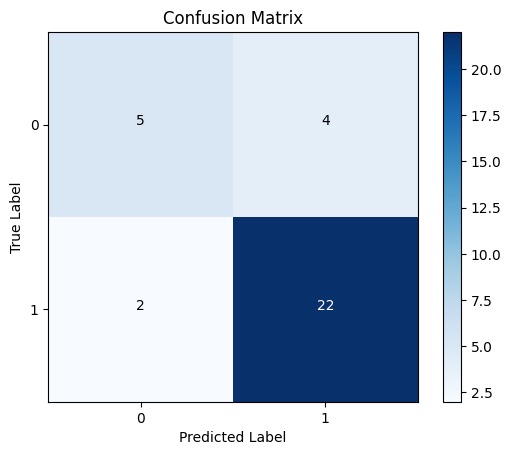

In [ ]:
import itertools

cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(np.unique(true_labels)))
plt.xticks(tick_marks, np.unique(true_labels))
plt.yticks(tick_marks, np.unique(true_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Save and try the model

In [ ]:
model

In [ ]:
# save the trained model
trainer.save_model("/content/model")

In [ ]:
# try the model
from transformers import pipeline
image = test_data['test'][31]['img_path'] #define the image that you want to predict here

classifier = pipeline("image-classification", model="/content/model")
classifier(image)

[{'score': 0.5373179316520691, 'label': 1},
 {'score': 0.46268197894096375, 'label': 0}]